In [27]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [28]:
data = pd.read_csv("./ECG_Processed.csv")
data.head()

,Pat_ID,ID,age,sex,Acute infarction (localization),Smoker,i_Mean_ECG_Rate,i_Mean_ECG_Quality,i_Coeff_R_peaks,i_Mean_ECG_Phase_Atrial,...,0_Mean_ECG_Phase_Completion_Ventricular,0_Coeff_RR_intervals,0_Coeff_PR_intervals,0_Coeff_QT_intervals,0_std_pp_intervals,0_std_QRS_Interval,0_HRV_SDNN,0_HRV_RMSSD,0_HRV_pNN20,target
0,patient001,s0010_re,81.0,female,infero-latera,no,81.773949,0.603859,27.156243,0.197663,...,0.489792,0.012929,0.233522,0.134078,0.052042,0.000052,9.580167,11.401754,3.921569,Myocardial infarction
1,patient001,s0014lre,81.0,female,infero-latera,no,86.246142,0.925716,26.404201,0.207896,...,0.495395,0.011190,0.276411,1.643388,0.053522,0.000042,7.811761,7.815354,3.658537,Myocardial infarction
2,patient001,s0016lre,81.0,female,infero-latera,no,79.856263,0.875193,27.421546,0.198774,...,0.495920,0.021960,0.231771,1.229889,0.051539,0.000039,16.561997,22.153438,14.473684,Myocardial infarction
3,patient002,s0015lre,58.0,female,anterior,yes,78.863330,0.789990,27.602788,0.139431,...,0.496615,0.027987,0.190472,1.765927,0.051201,0.000047,21.366385,9.045374,4.000000,Myocardial infarction
4,patient003,s0017lre,63.0,male,infero-postero-lateral,yes,72.289757,0.711433,28.875294,0.210481,...,0.494705,0.028571,0.191781,1.428576,0.048413,0.000045,23.794461,11.989885,10.218978,Myocardial infarction


In [29]:
data['target'].value_counts()

target
Myocardial infarction     367
Healthy control            80
Dysrhythmia                16
Cardiomyopathy             15
Bundle branch block        15
Hypertrophy                 7
Valvular heart disease      6
Myocarditis                 4
Stable angina               2
Heart failure (NYHA 2)      1
Heart failure (NYHA 3)      1
Heart failure (NYHA 4)      1
Palpitation                 1
Unstable angina             1
Name: count, dtype: int64

In [30]:
data = data.drop(columns={'Pat_ID','ID'})

In [34]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = ['sex','Acute infarction (localization)', 'Smoker','target']

# Apply label encoding to each specified column
for col in columns_to_encode:
    data[col] = label_encoder.fit_transform(data[col])

data.head()

,age,sex,Acute infarction (localization),Smoker,i_Mean_ECG_Rate,i_Mean_ECG_Quality,i_Coeff_R_peaks,i_Mean_ECG_Phase_Atrial,i_Mean_ECG_Phase_Completion_Atrial,i_Mean_ECG_Phase_Ventricular,...,0_Mean_ECG_Phase_Completion_Ventricular,0_Coeff_RR_intervals,0_Coeff_PR_intervals,0_Coeff_QT_intervals,0_std_pp_intervals,0_std_QRS_Interval,0_HRV_SDNN,0_HRV_RMSSD,0_HRV_pNN20,target
0,81.0,0,5,1,81.773949,0.603859,27.156243,0.197663,0.489167,0.498944,...,0.489792,0.012929,0.233522,0.134078,0.052042,0.000052,9.580167,11.401754,3.921569,8
1,81.0,0,5,1,86.246142,0.925716,26.404201,0.207896,0.495786,0.493150,...,0.495395,0.011190,0.276411,1.643388,0.053522,0.000042,7.811761,7.815354,3.658537,8
2,81.0,0,5,1,79.856263,0.875193,27.421546,0.198774,0.496376,0.471129,...,0.495920,0.021960,0.231771,1.229889,0.051539,0.000039,16.561997,22.153438,14.473684,8
3,58.0,0,0,3,78.863330,0.789990,27.602788,0.139431,0.495812,0.312683,...,0.496615,0.027987,0.190472,1.765927,0.051201,0.000047,21.366385,9.045374,4.000000,8
4,63.0,1,9,3,72.289757,0.711433,28.875294,0.210481,0.494297,0.382452,...,0.494705,0.028571,0.191781,1.428576,0.048413,0.000045,23.794461,11.989885,10.218978,8


In [35]:
data.isnull().sum()

age                                18
sex                                 0
Acute infarction (localization)     0
Smoker                              0
i_Mean_ECG_Rate                     0
                                   ..
0_std_QRS_Interval                  0
0_HRV_SDNN                          0
0_HRV_RMSSD                         0
0_HRV_pNN20                         0
target                              0
Length: 65, dtype: int64

In [37]:
# Check correlation of 'age' with other numerical columns
correlation_matrix = data.corr()
age_correlation = correlation_matrix['age'].sort_values(ascending=False)

# Get column names with positive correlation
positive_correlation_columns = age_correlation[age_correlation > 0].index.tolist()

# Remove 'age' from the list, as it's the target column
positive_correlation_columns.remove('age')

print("Columns to use as inputs for RandomForest:")
print(positive_correlation_columns)

Columns to use as inputs for RandomForest:
['target', 'i_Coeff_QT_intervals', 'i_Mean_ECG_Phase_Atrial', 'ii_Mean_ECG_Phase_Atrial', 'ii_Coeff_QT_intervals', 'iii_Coeff_PR_intervals', 'ii_Coeff_PR_intervals', 'iii_Coeff_QT_intervals', 'iii_Mean_ECG_Phase_Atrial', 'i_Mean_ECG_Rate', '0_std_pp_intervals', 'i_std_pp_intervals', 'i_Mean_ECG_Phase_Ventricular', '0_Mean_ECG_Rate', '0_Mean_ECG_Quality', 'i_Coeff_PR_intervals', '0_Mean_ECG_Phase_Atrial', 'ii_std_pp_intervals', 'ii_HRV_RMSSD', 'iii_Mean_ECG_Rate', 'iii_Coeff_RR_intervals', 'ii_Mean_ECG_Rate', 'ii_std_QRS_Interval', '0_std_QRS_Interval', 'ii_Coeff_RR_intervals', 'ii_HRV_SDNN', 'iii_Mean_ECG_Phase_Ventricular', 'iii_std_pp_intervals', 'iii_HRV_RMSSD', 'iii_HRV_SDNN', 'i_HRV_RMSSD', 'i_Coeff_RR_intervals', '0_Mean_ECG_Phase_Ventricular', 'i_HRV_SDNN', 'iii_std_QRS_Interval', 'iii_Mean_ECG_Quality', 'ii_Mean_ECG_Quality', '0_HRV_RMSSD']


In [38]:
# Split data into rows with and without missing 'age'
df_not_null = data[data['age'].notnull()]
df_null = data[data['age'].isnull()]

# Define the training and prediction sets
X_train = df_not_null[positive_correlation_columns]
y_train = df_not_null['age']
X_null = df_null[positive_correlation_columns]

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predict missing 'age' values
predicted_ages = rf_model.predict(X_null)

# Fill the missing 'age' values in the dataframe
data.loc[data['age'].isnull(), 'age'] = predicted_ages

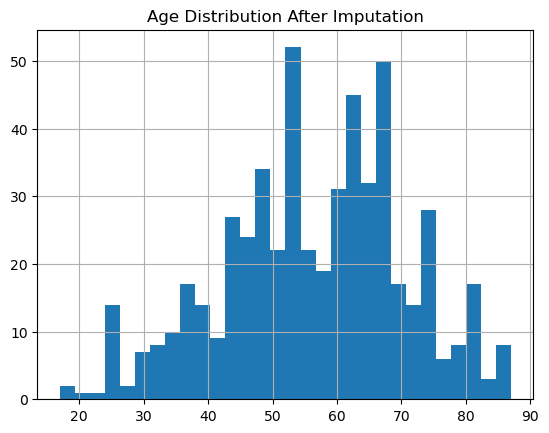

In [39]:
import matplotlib.pyplot as plt
data['age'].hist(bins=30)
plt.title('Age Distribution After Imputation')
plt.show()

In [40]:
# Separate features (X) and target (y)
X = data.drop(columns=['target'])  # Exclude the target
y = data['target']  # Target variable
y.value_counts()

target
8     367
3      80
14     27
2      16
1      15
0      15
7       7
13      6
9       4
11      2
4       1
5       1
6       1
10      1
12      1
Name: count, dtype: int64

In [41]:
# Step 2: Standardize the data (important for PCA)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

In [42]:
# Step 3: Apply PCA
pca = PCA()
pca.fit(data_scaled)

PCA()

In [43]:
# Step 4: Analyze explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

In [44]:
#Determine how many components explain, for example, 95% variance
num_components_95 = next(i for i, v in enumerate(cumulative_variance) if v >= 0.95) + 1
print(f"Number of components explaining 95% variance: {num_components_95}")

Number of components explaining 95% variance: 29


In [17]:
# Step 5: Find feature importance for the top components
# Each PCA component has a "loading" that shows feature contributions
components = pca.components_  # Shape: (num_components, num_features)
feature_importance = pd.DataFrame(components[:num_components_95].T,
                                   columns=[f'PC{i+1}' for i in range(num_components_95)],
                                   index=X.columns)
print("Feature importance for top principal components:")
print(feature_importance)

Feature importance for top principal components:
                                      PC1       PC2       PC3       PC4  \
age                             -0.024641  0.112042  0.109046  0.035041   
sex                              0.031525 -0.020698 -0.031552  0.012178   
Acute infarction (localization)  0.066561  0.045006  0.106977 -0.010122   
Smoker                          -0.027061 -0.109337 -0.091918  0.048104   
i_Mean_ECG_Rate                 -0.200338  0.161708 -0.022244  0.057321   
...                                   ...       ...       ...       ...   
0_std_pp_intervals              -0.203912  0.111795 -0.007316  0.070959   
0_std_QRS_Interval              -0.170736  0.050415 -0.070667  0.078276   
0_HRV_SDNN                       0.099206  0.120623 -0.142516 -0.047899   
0_HRV_RMSSD                      0.110501  0.161367 -0.145053 -0.046253   
0_HRV_pNN20                      0.161142  0.103098 -0.149556 -0.046794   

                                      PC5       PC

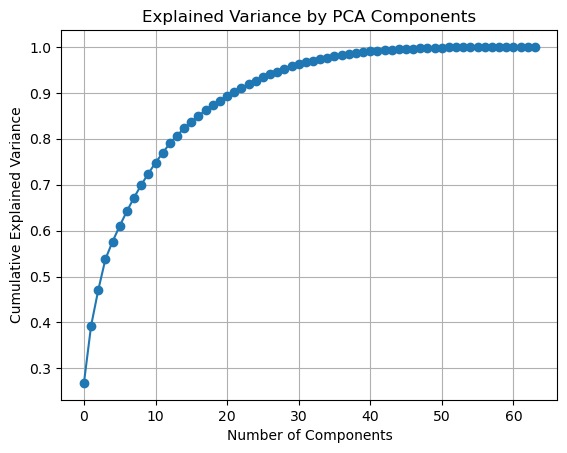

In [19]:
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()

In [20]:
top_features_pc1 = feature_importance['PC1'].abs().sort_values(ascending=False)
print("Top features contributing to PC1:")
print(top_features_pc1.head(10))  # Top 10 features

Top features contributing to PC1:
i_std_pp_intervals     0.213359
i_Coeff_R_peaks        0.211302
ii_std_pp_intervals    0.208369
0_Coeff_R_peaks        0.208056
0_std_pp_intervals     0.203912
ii_Coeff_R_peaks       0.202308
i_Mean_ECG_Rate        0.200338
0_Mean_ECG_Rate        0.196898
ii_Mean_ECG_Rate       0.194065
iii_Mean_ECG_Rate      0.191655
Name: PC1, dtype: float64


In [49]:
n_components = 29

# Initialize PCA with selected number of components
pca = PCA(n_components=n_components)

# Fit PCA and transform data
X_pca = pca.fit_transform(data_scaled)

# Convert to DataFrame for better readability
transformed_df = pd.DataFrame(X_pca, columns=[f'Feature{i+1}' for i in range(n_components)])

In [50]:
transformed_df['target'] = y
# Print first few rows of transformed dataset
print(transformed_df.head())

   Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  Feature7  \
0 -1.944044  1.891310  5.378017 -1.099764  0.319998 -0.107990  0.192998   
1  0.548890  3.689146 -1.079215 -1.125497  6.892610 -0.114086 -0.129833   
2  1.044743  2.804073 -1.779122 -0.358211  6.132624 -1.309396 -0.731316   
3 -2.848743 -2.220174 -0.498797 -0.054547  0.073406  0.927517  1.891807   
4 -0.715628  0.217362  2.032461 -0.144826  4.375660 -1.762026  1.335940   

   Feature8  Feature9  Feature10  ...  Feature21  Feature22  Feature23  \
0 -0.531588 -1.978358   0.505306  ...   0.435838  -0.375777  -2.410484   
1 -4.471123  1.281707   2.509007  ...  -0.515136  -1.814937  -0.659753   
2 -3.381683 -1.444734   3.028355  ...  -0.928873  -1.592203  -0.389953   
3 -0.381548  0.017551   0.659493  ...   0.662054   0.671306  -0.463003   
4  1.742721 -1.771379   0.819612  ...  -0.428352  -0.511074  -0.346423   

   Feature24  Feature25  Feature26  Feature27  Feature28  Feature29  target  
0   1.307302  -0.447091  -

In [52]:
# Save to CSV
transformed_df.to_csv('./PCA_Transformed.csv', index=False)  # 'index=False' to avoid saving row indices